<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning/blob/master/Python/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 識別 ー概念学習ー

## カテゴリカルデータで決定木を作成

ライブラリの読み込み

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

Contact-lensesデータの取得

In [ ]:
df = fetch_openml(name='contact-lenses', parser="auto")
df.data

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,none
9,pre-presbyopic,myope,no,normal,soft


In [ ]:
X = df.data.drop('contact-lenses', axis=1)
y = df.data.loc[:, 'contact-lenses']

 Contact-lensesデータの特徴値とクラス

 - age (目の年齢) {'young', 'pre-presbyopic', 'presbyopic'} (若年, 老眼前期, 老眼)
 - spectacle-prescrip (眼鏡) {'myope', 'hypermetrope'} (近視, 遠視)
 - astigmatism (乱視) {'no', 'yes'} (なし, あり)
 - tear-prod-rate (涙量) {'reduced', 'normal'} (減少, 正常)
 - contact-lenses (クラス) {'soft', 'hard', 'none'} (ソフト, ハード, なし)

カテゴリカルデータを数値データに変換


*   特徴ベクトルは[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)で、各特徴の値毎のバイナリ値に変換
*   正解は[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)で整数値に変換



In [ ]:
enc_X =  OneHotEncoder(sparse_output=False)
X2 = enc_X.fit_transform(X)
enc_X.get_feature_names_out()

array(['age_pre-presbyopic', 'age_presbyopic', 'age_young',
       'spectacle-prescrip_hypermetrope', 'spectacle-prescrip_myope',
       'astigmatism_no', 'astigmatism_yes', 'tear-prod-rate_normal',
       'tear-prod-rate_reduced'], dtype=object)

In [ ]:
X2

array([[0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0.

In [ ]:
enc_y = LabelEncoder()
y2 = enc_y.fit_transform(y)
enc_y.classes_

array(['hard', 'none', 'soft'], dtype=object)

In [ ]:
y2

array([1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1])

決定木の学習と表示


*   ノードに書かれている分岐条件が成立するならば左、不成立ならば右の枝を選ぶ
  * 左の枝に True, 右の枝に False のラベルが付いていると解釈すればよい
  * たとえば `tear-prod-rate_normal <= 0.5` は `tear-prod-rate` の値が `normal` でなければ（すなわち`reduced`であれば）、左の枝を選ぶと解釈する
* ノードのclassは最頻のクラスを表す
* リーフのclassは分類結果を表す
* いずれも色で（最頻の）クラス、色の濃さでその割合を表す



木の表示は、scikit-learn ver0.21以降で導入された [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) メソッドによって、教科書p.57のコードよりもかなり簡単になっています。  

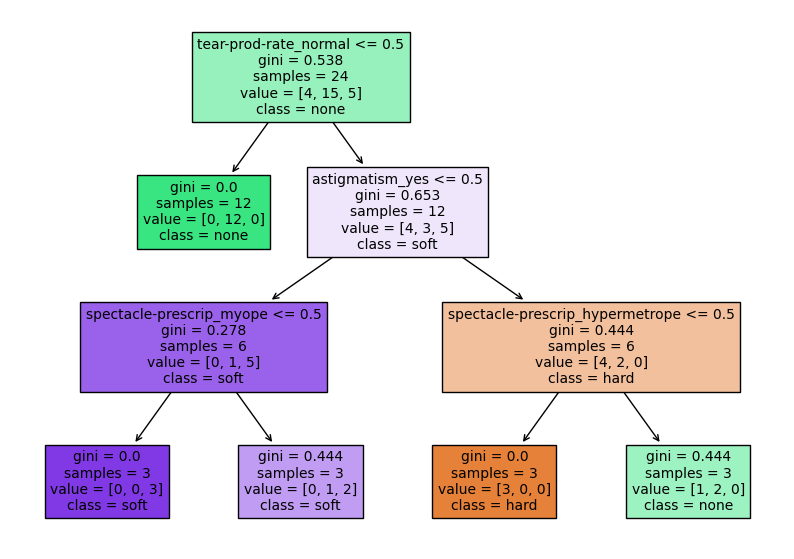

In [ ]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=9)
clf.fit(X2, y2)
plt.figure(figsize=(10,7)) #表示領域を(横, 縦)で指定
plot_tree(clf, filled=True, fontsize=10,
          feature_names=enc_X.get_feature_names_out(),
          class_names=enc_y.classes_)
plt.show()

## 数値データで決定木を作成

第2章で用いたirisデータで決定木を作成します。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

まず、全学習データで決定木を作成し、表示します。

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

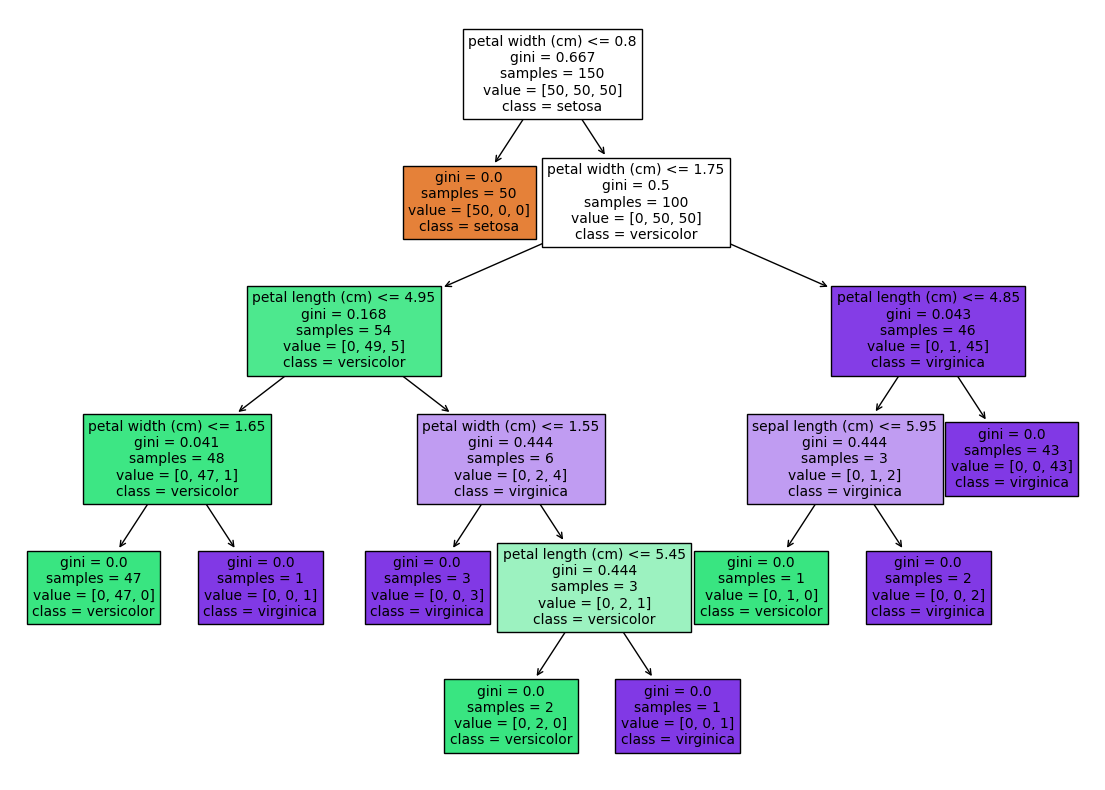

In [ ]:
plt.figure(figsize=(14,10))
plot_tree(clf, filled=True, fontsize=10, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

交差確認法で性能評価を行います。

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print(f'Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})')

Accuracy: 0.96 (+/- 0.09)


# 演習問題

1. カテゴリカルデータと数値データが混在した [weather.numeric.arff](https://raw.githubusercontent.com/bnjmn/weka/master/wekadocs/data/weather.numeric.arff) データから決定木を作成してください。
1. scikit-learn付属のwineデータで決定木の作成・表示と交差確認法による評価を行ってください。可能ならば、木の深さを変えて性能の違いを調べてください。（wineデータの説明は教科書p.55にあります。）
1. 決定木学習において、前処理として標準化を行わない理由を考えてください。

（解答例はnotebookの下部）


## 参考ページ

* Decision trees https://scikit-learn.org/stable/modules/tree.html

## カテゴリデータに対する決定木

scikit-learnではカテゴリデータそのままで決定木を作る方法がありません。以下は weather-nominal データに対して、ライブラリとしてnumpyのみを用いて決定木を作成するコードです。

In [ ]:
# generated by GPT-3.5 2023/6/23
import numpy as np

# ゴルフデータの特徴量とラベルを定義
features = [
    ['晴れ', '暑い', '高い', '弱い'],
    ['晴れ', '暑い', '高い', '強い'],
    ['くもり', '暑い', '高い', '弱い'],
    ['雨', '普通', '高い', '弱い'],
    ['雨', '寒い', '普通', '弱い'],
    ['雨', '寒い', '普通', '強い'],
    ['くもり', '寒い', '普通', '強い'],
    ['晴れ', '普通', '高い', '弱い'],
    ['晴れ', '寒い', '普通', '弱い'],
    ['雨', '普通', '普通', '弱い'],
    ['晴れ', '普通', '普通', '強い'],
    ['くもり', '普通', '高い', '強い'],
    ['くもり', '暑い', '普通', '弱い'],
    ['雨', '普通', '高い', '強い']
]

labels = ['プレイしない', 'プレイする', 'プレイする', 'プレイする', 'プレイする', 'プレイしない', 'プレイする', 'プレイしない',
          'プレイしない', 'プレイしない', 'プレイする', 'プレイする', 'プレイする', 'プレイしない']

class Node:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.label = None
        self.left = None
        self.right = None

def calculate_entropy(labels):
    # ラベルの出現回数を計算
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_information_gain(features, labels, feature_index):
    entropy = calculate_entropy(labels)
    unique_values = np.unique(features[:, feature_index])
    weighted_entropy = 0

    for value in unique_values:
        subset_labels = labels[features[:, feature_index] == value]
        subset_probability = len(subset_labels) / len(labels)
        weighted_entropy += subset_probability * calculate_entropy(subset_labels)

    information_gain = entropy - weighted_entropy
    return information_gain

def build_decision_tree(features, labels):
    node = Node()

    if len(np.unique(labels)) == 1:
        node.label = labels[0]
        return node

    best_gain = 0
    best_feature_index = None

    for i in range(features.shape[1]):
        gain = calculate_information_gain(features, labels, i)
        if gain > best_gain:
            best_gain = gain
            best_feature_index = i

    if best_feature_index is None:
        node.label = max(set(labels), key=labels.count)
        return node

    node.feature_index = best_feature_index
    unique_values = np.unique(features[:, best_feature_index])

    for value in unique_values:
        subset_features = features[features[:, best_feature_index] == value]
        subset_labels = labels[features[:, best_feature_index] == value]
        child = build_decision_tree(subset_features, subset_labels)

        if value == unique_values[0]:
            node.left = child
        else:
            node.right = child

    return node

def print_tree(node, depth=0):
    indent = "  " * depth

    if node.label is not None:
        print(indent + "ラベル: " + node.label)
        return

    feature_name = "特徴量 " + str(node.feature_index + 1)
    print(indent + feature_name + ":")

    print(indent + "左の枝:")
    print_tree(node.left, depth + 1)

    print(indent + "右の枝:")
    print_tree(node.right, depth + 1)

# 決定木の構築
features = np.array(features)
labels = np.array(labels)
root = build_decision_tree(features, labels)

# 決定木の出力
print_tree(root)


特徴量 1:
左の枝:
  ラベル: プレイする
右の枝:
  特徴量 4:
  左の枝:
    特徴量 2:
    左の枝:
      ラベル: プレイする
    右の枝:
      特徴量 3:
      左の枝:
        ラベル: プレイしない
      右の枝:
        ラベル: プレイする
  右の枝:
    ラベル: プレイしない


## 演習問題の解答例

1. カテゴリカルデータと数値データが混在したweather.numeric.arffデータから決定木を作成してください
1. scikit-learn付属のwineデータで決定木の作成・表示と交差確認法による評価を行ってください。可能ならば、木の深さを変えて性能の違いを調べてください。（wineデータの説明は教科書p.55にあります。）
1. 決定木学習において、前処理として標準化を行わない理由を考えてください。


## 1. カテゴリカルデータと数値データが混在した特徴ベクトルの扱い

weather.numeric.arffデータの読み込み

In [ ]:
!wget https://raw.githubusercontent.com/bnjmn/weka/master/wekadocs/data/weather.numeric.arff

--2023-09-29 00:26:48--  https://raw.githubusercontent.com/bnjmn/weka/master/wekadocs/data/weather.numeric.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495 [text/plain]
Saving to: ‘weather.numeric.arff’

weather.numeric.arf 100%[===================>]     495  --.-KB/s    in 0s      

2023-09-29 00:26:49 (32.1 MB/s) - ‘weather.numeric.arff’ saved [495/495]



ライブラリの読み込み

In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

pandasのDataFrameに変換

In [ ]:
ds, meta = arff.loadarff('weather.numeric.arff')
data = pd.DataFrame(np.asarray(ds.tolist(), dtype='U'), columns=meta.names())
data['temperature'] = data['temperature'].astype(float)
data['humidity'] = data['humidity'].astype(float)
data

,outlook,temperature,humidity,windy,play
0,sunny,85.0,85.0,FALSE,no
1,sunny,80.0,90.0,TRUE,no
2,overcast,83.0,86.0,FALSE,yes
3,rainy,70.0,96.0,FALSE,yes
4,rainy,68.0,80.0,FALSE,yes
5,rainy,65.0,70.0,TRUE,no
6,overcast,64.0,65.0,TRUE,yes
7,sunny,72.0,95.0,FALSE,no
8,sunny,69.0,70.0,FALSE,yes
9,rainy,75.0,80.0,FALSE,yes


In [ ]:
meta.names()[1]

'temperature'

In [ ]:
c = meta.names()
X_cat = data[[c[0],c[3]]]
X_num = data[[c[1],c[2]]]
y = data[c[-1]]

カテゴリカルデータを数値データに変換


*   特徴ベクトルのうち、outlook列とwindy列は[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)で、各特徴の値毎のバイナリ値に変換
*   正解は[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)で整数値に変換



In [ ]:
enc_X =  OneHotEncoder(sparse=False)
X2 = pd.DataFrame(enc_X.fit_transform(X_cat), columns=enc_X.get_feature_names_out(), dtype='int8')
enc_X.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['outlook_overcast', 'outlook_rainy', 'outlook_sunny',
       'windy_FALSE', 'windy_TRUE'], dtype=object)

In [ ]:
X = pd.concat([X2, X_num], axis=1)
X.columns

Index(['outlook_overcast', 'outlook_rainy', 'outlook_sunny', 'windy_FALSE',
       'windy_TRUE', 'temperature', 'humidity'],
      dtype='object')

In [ ]:
enc_y = LabelEncoder()
y2 = enc_y.fit_transform(y)
enc_y.classes_

array(['no', 'yes'], dtype=object)

In [ ]:
y2

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

決定木の学習と表示




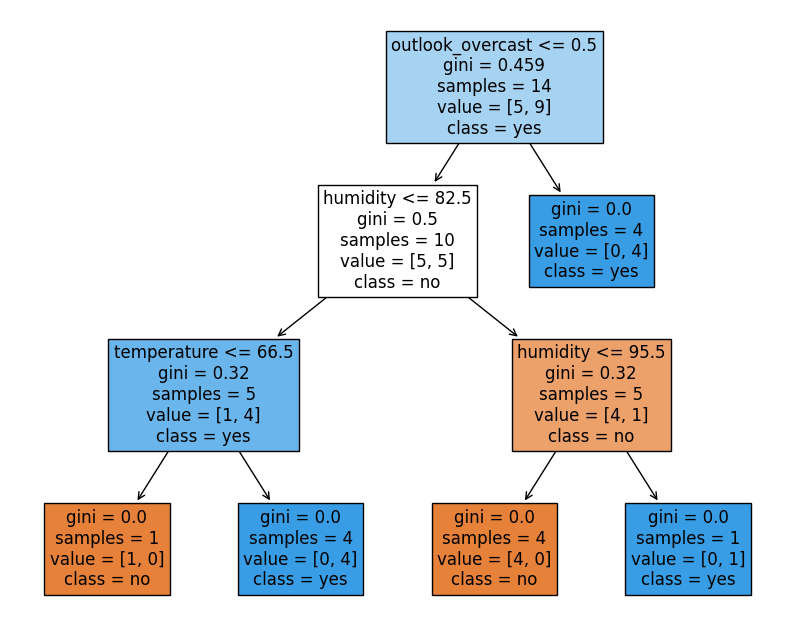

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y2)
plt.figure(figsize=(10,8)) #表示領域を(横, 縦)で指定
plot_tree(clf, filled=True, fontsize=12,
          feature_names=X.columns,
          class_names=enc_y.classes_)
plt.show()

## 2. 決定木のハイパーパラメータ調整

決定木の作成および表示

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [ ]:
wine = load_wine(as_frame=True)
X = wine.data
y = wine.target

In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


木の作成

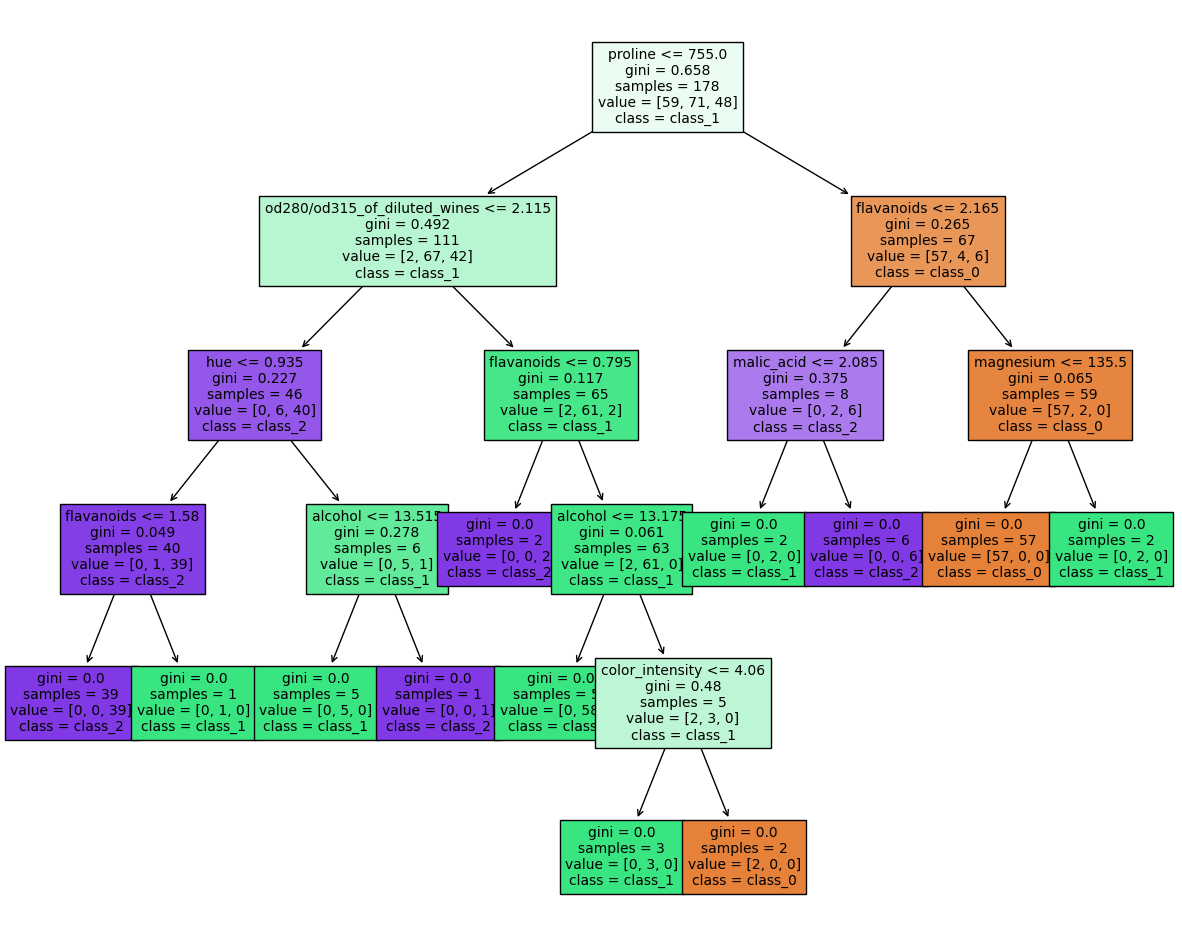

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, fontsize=10)
plt.show()

木の深さと性能の関係

In [ ]:
for d in range(2,10):
  clf = DecisionTreeClassifier(max_depth=d)
  scores = cross_val_score(clf, X, y, cv=10)
  print(f'Depth:{d}   Accuracy: {scores.mean():.2f} (+/- {scores.std()*2:.2f})')

Depth:2   Accuracy: 0.84 (+/- 0.18)
Depth:3   Accuracy: 0.87 (+/- 0.20)
Depth:4   Accuracy: 0.88 (+/- 0.16)
Depth:5   Accuracy: 0.86 (+/- 0.21)
Depth:6   Accuracy: 0.87 (+/- 0.18)
Depth:7   Accuracy: 0.88 (+/- 0.13)
Depth:8   Accuracy: 0.88 (+/- 0.16)
Depth:9   Accuracy: 0.87 (+/- 0.16)


## 3. 解答例

決定木では、特徴ベクトルの個々の次元の値のみでデータの分割が行われるので、他の次元とスケールや平均が異なっていても、結果に影響を及ぼしません。また、標準化を行って値そのものを変えてしまうと、学習された決定木の解釈性が失われます。

## 参考 find-S アルゴリズム

In [ ]:
# generated by GPT-4

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

# contact-lenses データの取得
df = fetch_openml(name='contact-lenses', parser="auto")
X = df.data.drop('contact-lenses', axis=1)
y = df.data.loc[:, 'contact-lenses']

# データのエンコード
# 特徴量の名前を取得してエンコーディングする
feature_names = X.columns
X_encoded = X.copy()
encoders = {}

for col in feature_names:
    # 各特徴量のエンコーダーを生成
    encoders[col] = LabelEncoder()
    X_encoded[col] = encoders[col].fit_transform(X[col])

# ターゲット変数のエンコーディング
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# noneの値をエンコードする
target_value = le.transform(['none'])[0]

# find-sアルゴリズムの実装
def find_s(data, target, target_value):
    # 最初の正の例を見つける
    for i in range(len(target)):
        if target[i] == target_value:
            specific_hypothesis = data.iloc[i].tolist()
            break

    # 最も特定的な仮説を見つける
    for i in range(len(target)):
        if target[i] == target_value:
            instance = data.iloc[i].tolist()
            specific_hypothesis = [specific_hypothesis[j] if specific_hypothesis[j] == instance[j] else '?' for j in range(len(specific_hypothesis))]
            print(f'{i}: {specific_hypothesis}')

    return specific_hypothesis

# アルゴリズムを適用
hypothesis = find_s(X_encoded, y_encoded, target_value)

# 結果の表示
print("Find-Sの結果の仮説:")
print(hypothesis)

# 各特徴量のデコーディング（結果の仮説を理解しやすい形にする）
decoded_hypothesis = {}
for i, feature in enumerate(feature_names):
    if hypothesis[i] != '?':
        decoded_hypothesis[feature] = encoders[feature].inverse_transform([hypothesis[i]])[0]
    else:
        decoded_hypothesis[feature] = '?'

print("\nデコードされた仮説:")
print(decoded_hypothesis)


0: [2, 1, 0, 1]
2: [2, 1, '?', 1]
4: [2, '?', '?', 1]
6: [2, '?', '?', 1]
8: ['?', '?', '?', 1]
10: ['?', '?', '?', 1]
12: ['?', '?', '?', 1]
14: ['?', '?', '?', 1]
15: ['?', '?', '?', '?']
16: ['?', '?', '?', '?']
17: ['?', '?', '?', '?']
18: ['?', '?', '?', '?']
20: ['?', '?', '?', '?']
22: ['?', '?', '?', '?']
23: ['?', '?', '?', '?']
Find-Sの結果の仮説:
['?', '?', '?', '?']

デコードされた仮説:
{'age': '?', 'spectacle-prescrip': '?', 'astigmatism': '?', 'tear-prod-rate': '?'}
